# Level 2
### Task 1 : Table Booking and Online Delivery 
- Determine the percentage of restraunts that offer table booking and online delivery
- compare the average ratings of restraunts with table bookings and those without 
- Analyze the availability of online delivery among restraunts with different price ranges

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [44]:
df=pd.read_csv(r"C:\Users\Lenovo\Downloads\Dataset (1).csv")
df.head(3)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270


In [45]:
pivot_table_table_booking = pd.pivot_table(df, values='Restaurant ID', index='Has Table booking', aggfunc='count')
total_restaurants=df.shape[0]
pivot_table_table_booking['pertenctage']=(pivot_table_table_booking['Restaurant ID'] / total_restaurants) * 100
pivot_table_table_booking

,Restaurant ID,pertenctage
Has Table booking,,
No,8393,87.875615
Yes,1158,12.124385


In [46]:
pivot_has_online_delivery=pd.pivot_table(df,index='Has Online delivery',values='Restaurant ID',aggfunc='count')
pivot_has_online_delivery['percentage']=pivot_has_online_delivery['Restaurant ID']/total_restaurants*100
pivot_has_online_delivery

,Restaurant ID,percentage
Has Online delivery,,
No,7100,74.337766
Yes,2451,25.662234


In [47]:
average_rating_with_booking = df[df['Has Table booking'] == 'Yes']['Aggregate rating'].mean()
average_rating_without_booking = df[df['Has Table booking'] == 'No']['Aggregate rating'].mean()
print(f"Average rating for restaurants with Table Booking: {average_rating_with_booking:.2f}")
print(f"Average rating for restaurants without Table Booking: {average_rating_without_booking:.2f}")

Average rating for restaurants with Table Booking: 3.44
Average rating for restaurants without Table Booking: 2.56


In [48]:
pivot_table_online_delivery = pd.pivot_table(df, values='Restaurant ID', index='Price range', columns='Has Online delivery', aggfunc='count', fill_value=0)
pivot_table_online_delivery

Has Online delivery,No,Yes
Price range,,
1,3743,701
2,1827,1286
3,997,411
4,533,53


- Price Range 1: 3743 restaurants do not offer online delivery, while 701 restaurants do offer online delivery.
- Price Range 2: 1827 restaurants do not offer online delivery, while 1286 restaurants do offer online delivery.
- Price Range 3: 997 restaurants do not offer online delivery, while 411 restaurants do offer online delivery.
- Price Range 4: 533 restaurants do not offer online delivery, while 53 restaurants do offer online delivery.

In [49]:
table1=pd.pivot_table(df,index='Price range',values='Restaurant ID',columns='Has Table booking',aggfunc='count')
table1

Has Table booking,No,Yes
Price range,,
1,4443,1
2,2874,239
3,764,644
4,312,274


- Price Range 1: 4443 restaurants do not offer table booking, while 1 restaurant does offer table booking.
- Price Range 2: 2874 restaurants do not offer table booking, while 239 restaurants do offer table booking.
- Price Range 3: 764 restaurants do not offer table booking, while 644 restaurants do offer table booking.
- Price Range 4: 312 restaurants do not offer table booking, while 274 restaurants do offer table booking.

In [50]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [51]:
table2=pd.pivot_table(df,index='Rating color',values='Restaurant ID',aggfunc='count')
table2

,Restaurant ID
Rating color,
Dark Green,301
Green,1079
Orange,3737
Red,186
White,2148
Yellow,2100


In [52]:
table3=pd.pivot_table(df,index='Aggregate rating',values='Restaurant ID',aggfunc='count')
table3

,Restaurant ID
Aggregate rating,
0.0,2148
1.8,1
1.9,2
2.0,7
2.1,15
2.2,27
2.3,47
2.4,87
2.5,110


### Task 2: Price Range Analysis
- Determine the most common price range among all the restraunts
- calculate the average rating for each price range
- Identify the color that represent the highest average rating among different price ranges. 

In [53]:
df.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591


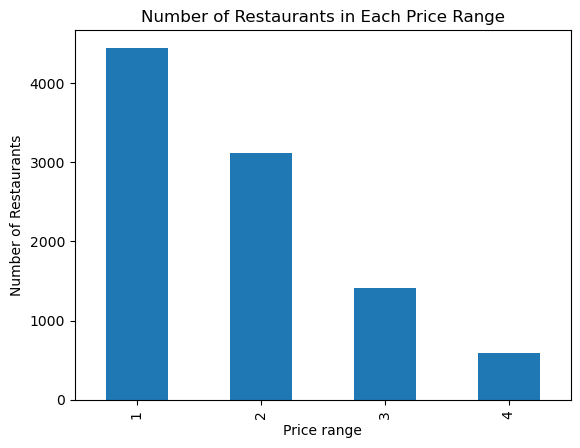

In [54]:
Price_range=pd.pivot_table(df,index='Price range',values='Restaurant ID',aggfunc='count')
Price_range.plot(kind='bar',legend=False)
plt.ylabel('Number of Restaurants')
plt.title('Number of Restaurants in Each Price Range')
plt.show()

In [55]:
average_rating_price_range=df.groupby('Price range')['Aggregate rating'].mean()
print(average_rating_price_range)

Price range
1    1.999887
2    2.941054
3    3.683381
4    3.817918
Name: Aggregate rating, dtype: float64


- Price Range 1 (Average Rating: 1.999887): Restaurants in this price range have an average rating of approximately 2.0. This suggests that these budget-friendly restaurants generally receive moderate ratings.

- Price Range 2 (Average Rating: 2.941054): Restaurants in Price Range 2 have an average rating of around 2.94. This indicates that these moderately priced restaurants tend to have slightly higher ratings compared to Price Range 1.

- Price Range 3 (Average Rating: 3.683381): Restaurants in this higher price range have an average rating of about 3.68. It implies that these restaurants, which likely offer more upscale dining experiences, receive relatively higher ratings.

- Price Range 4 (Average Rating: 3.817918): The highest-priced restaurants (Price Range 4) have an average rating of approximately 3.82. This suggests that these fine dining and luxury establishments generally receive the highest ratings among all price ranges.

In [56]:
average_rating_by_price_range = df.groupby('Price range')['Aggregate rating'].mean()
highest_average_rating_price_range = average_rating_by_price_range.idxmax()
color_for_highest_rating = df[df['Price range'] == highest_average_rating_price_range]['Rating color'].values[0]
print("The color representing the highest average rating among different price ranges is:", color_for_highest_rating)

The color representing the highest average rating among different price ranges is: Green


### Task 3: Feature Engineering
- Extract Additional features From the Existing columns such as length of the restraunt name or address
- Create new feature like "Has Table booking" or "Has Online Delivery " by encoding categorical variables. 

In [57]:
df['Restaurant Name Length'] = df['Restaurant Name'].apply(lambda x: len(x))
df['Address Length'] = df['Address'].apply(lambda x: len(x))
df.head(3)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Restaurant Name Length,Address Length
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,No,No,No,3,4.8,Dark Green,Excellent,314,16,71
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,No,No,No,3,4.5,Dark Green,Excellent,591,16,67
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,No,No,No,4,4.4,Green,Very Good,270,22,56


In [61]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Restaurant Name Length', 'Address Length',
       'Has Online Delivery'],
      dtype='object')

In [59]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Has Table booking'] = label_encoder.fit_transform(df['Has Table booking'])
df['Has Online Delivery'] = label_encoder.fit_transform(df['Has Online delivery'])